In [1]:
import iris, windspharm
import warnings
import numpy as np
import iris.plot as iplt

import iris.quickplot as qplt

import matplotlib.pyplot as plt
import cartopy.crs as ccrs  
import mo_pack
from matplotlib import ticker, cm
import iris.analysis.cartography
import aeolus
from aeolus.coord import volume_weights_cube, area_weights_cube, coord_delta_to_cube

In [2]:
warnings.filterwarnings("ignore")


# Import data for BT-Settl spectra with and without regrouping of bins

In [9]:
pcb_y = iris.load('../data_b/pcb_b_2000_120.nc') #Yates et al. (2020) flux distribution
pcb_b = iris.load('../data_b/pcb_bhox_g5_7440_120.nc') #Improved regrouping of wavelengths
                


In [10]:
tsurf_y = pcb_y.extract_cube('surface_temperature')
avttsurf_y = tsurf_y.collapsed('t', iris.analysis.MEAN)
tair_y = pcb_y.extract_cube('air_temperature')
avttair_y = tair_y.collapsed('t', iris.analysis.MEAN)

o3mmr_y = pcb_y.extract_cube('O3 MASS MIXING RATIO')
avto3mmr_y = o3mmr_y.collapsed('t', iris.analysis.MEAN)
o3column_y = pcb_y.extract_cube('Stash code = 50219')
avto3column_y = o3column_y.collapsed('t', iris.analysis.MEAN)

rf50101_y = pcb_y.extract_cube('Stash code = 50101')
avt50101_y = rf50101_y.collapsed('t', iris.analysis.MEAN)
rf50011_y = pcb_y.extract_cube('Stash code = 50011')
avtrf50011_y = rf50011_y.collapsed('t', iris.analysis.MEAN)
rf50012_y = pcb_y.extract_cube('Stash code = 50012')
avtrf50012_y = rf50012_y.collapsed('t', iris.analysis.MEAN)
rf50013_y = pcb_y.extract_cube('Stash code = 50013')
avtrf50013_y = rf50013_y.collapsed('t', iris.analysis.MEAN)
rf50014_y = pcb_y.extract_cube('Stash code = 50014')
avtrf50014_y = rf50014_y.collapsed('t', iris.analysis.MEAN)
rf50016_y = pcb_y.extract_cube('Stash code = 50016')
avtrf50016_y = rf50016_y.collapsed('t', iris.analysis.MEAN)
rf50018_y = pcb_y.extract_cube('Stash code = 50018')
avtrf50018_y = rf50018_y.collapsed('t', iris.analysis.MEAN)
rf50019_y = pcb_y.extract_cube('Stash code = 50019')
avtrf50019_y = rf50019_y.collapsed('t', iris.analysis.MEAN)
rf50120_y = pcb_y.extract_cube('Stash code = 50120')
avtrf50120_y = rf50120_y.collapsed('t', iris.analysis.MEAN)

o3mmr_y = pcb_y.extract_cube('O3 MASS MIXING RATIO')
avto3mmr_y = o3mmr_y.collapsed('t', iris.analysis.MEAN)


In [ ]:
tsurf_b = pcb_b.extract_cube('surface_temperature')
avttsurf_b = tsurf_b.collapsed('t', iris.analysis.MEAN)
tair_b = pcb_b.extract_cube('air_temperature')
avttair_b = tair_b.collapsed('t', iris.analysis.MEAN)

o3mmr_b = pcb_b.extract_cube('O3 MASS MIXING RATIO')
avto3mmr_b = o3mmr_b.collapsed('t', iris.analysis.MEAN)
o3column_b = pcb_b.extract_cube('Stash code = 50219')
avto3column_b = o3column_b.collapsed('t', iris.analysis.MEAN)

rf50101_b = pcb_b.extract_cube('Stash code = 50101')
avt50101_b = rf50101_b.collapsed('t', iris.analysis.MEAN)
rf50011_b = pcb_b.extract_cube('Stash code = 50011')
avtrf50011_b = rf50011_b.collapsed('t', iris.analysis.MEAN)
rf50012_b = pcb_b.extract_cube('Stash code = 50012')
avtrf50012_b = rf50012_b.collapsed('t', iris.analysis.MEAN)
rf50013_b = pcb_b.extract_cube('Stash code = 50013')
avtrf50013_b = rf50013_b.collapsed('t', iris.analysis.MEAN)
rf50014_b = pcb_b.extract_cube('Stash code = 50014')
avtrf50014_b = rf50014_b.collapsed('t', iris.analysis.MEAN)
rf50016_b = pcb_b.extract_cube('Stash code = 50016')
avtrf50016_b = rf50016_b.collapsed('t', iris.analysis.MEAN)
rf50018_b = pcb_b.extract_cube('Stash code = 50018')
avtrf50018_b = rf50018_b.collapsed('t', iris.analysis.MEAN)
rf50019_b = pcb_b.extract_cube('Stash code = 50019')
avtrf50019_b = rf50019_b.collapsed('t', iris.analysis.MEAN)
rf50120_b = pcb_b.extract_cube('Stash code = 50120')
avtrf50120_b = rf50120_b.collapsed('t', iris.analysis.MEAN)

o3mmr_b = pcb_b.extract_cube('O3 MASS MIXING RATIO')
avto3mmr_b = o3mmr_b.collapsed('t', iris.analysis.MEAN)


# Some standard cube operations

In [5]:
from iris.util import broadcast_to_shape, guess_coord_axis, is_regular
from iris.analysis.cartography import wrap_lons

def zonal_mean(cube, lon_name="longitude"):
    """
    Calculate cube's zonal average.
    Parameters
    ----------
    cube: iris.cube.Cube
        Cube with a latitude coordinate.
    lon_name: str, optional
        Name of the longitude coordinate.
    Returns
    -------
    iris.cube.Cube
        Collapsed cube.
    """
    cube_mean = cube.collapsed(lon_name, iris.analysis.MEAN)
    return cube_mean


def meridional_mean(cube, lat_name="latitude"):
    """
    Calculate cube's meridional average.
    Parameters
    ----------
    cube: iris.cube.Cube
        Cube with a latitude coordinate.
    lat_name: str, optional
        Name of the latitude coordinate.
    Returns
    -------
    iris.cube.Cube
        Collapsed cube.
    """
    coslat = np.cos(np.deg2rad(cube.coord(lat_name).points))
    coslat2d = iris.util.broadcast_to_shape(
        coslat, cube.shape, cube.coord_dims(lat_name)
    )
    cube_mean = (cube * coslat2d).collapsed(lat_name, iris.analysis.SUM) / np.sum(
        coslat
    )
    return cube_mean

def cube_min(cube):
    a=cube.collapsed('latitude', iris.analysis.MIN)
    b=a.collapsed('longitude', iris.analysis.MIN)
    return b.data

def cube_max(cube):
    a=cube.collapsed('latitude', iris.analysis.MAX)
    b=a.collapsed('longitude', iris.analysis.MAX)
    return b.data

def deltacube(cube1,cube2):
    cube3 = (cube1-cube2)
    return cube3


 
def volume_weights_cube2(cube, r_planet=None, normalize=False, model=aeolus.model.um):
    """
    Create a cube of volume weights from a grid of a given cube.

    Parameters
    ----------
    cube: iris.cube.Cube
        Cube with longitude, latitude and height coordinates
    r_planet: float, optional
        Radius of the planet (m). If not given, an attempt is made
        to get it from the cube metadata.
    normalize: bool, optional
        Normalize the data.
    model: aeolus.model.Model, optional
        Model class with relevant coordinate names.

    Returns
    -------
    iris.cube.Cube
        Cube of area weights with the same metadata as the input cube
    """
    area_cube = area_weights_cube(cube, r_planet=r_planet, normalize=normalize, model=model)
    height_deltas = coord_delta_to_cube(cube, model.z, normalize=normalize)
    volume = area_cube * height_deltas
    if normalize:
        volume.rename("normalized_volume_weights")
        volume.convert_units("1")
    else:
        volume.rename("volume_weights")
        volume.units == "m**3"
    return volume

def _is_longitude_global(lon_points):
    """Return True if array of longitudes covers the whole sphere."""
    dx = np.diff(lon_points)[0]  # assume regular grid
    case_0_360 = ((lon_points[0] - dx) <= 0) and ((lon_points[-1] + dx) >= 360)
    case_pm180 = ((lon_points[0] - dx) <= -180) and ((lon_points[-1] + dx) >= 180)
    return case_0_360 or case_pm180

def roll_cube_pm180(cube_in):
    """
    Take a cube spanning 0...360 degrees in longitude and roll it to -180...180 degrees.

    Works with global model output, and in some cases for regional.

    Parameters
    ----------
    cube: iris.cube.Cube
        Cube with longitude and latitude coordinates.
    model: aeolus.model.Model, optional
        Model class with a relevant longitude coordinate name.

    Returns
    -------
    iris.cube.Cube

    See also
    --------
    aeolus.coord.roll_cube_0_360
    """
    cube = cube_in.copy()
    #coord_name = model.x  # get the name of the longitude coordinate
    xcoord = cube.coord('longitude')
    if (xcoord.points >= 0.0).all():
        assert is_regular(xcoord), "Operation is only valid for a regularly spaced coordinate."
        if _is_longitude_global(xcoord.points):
            # Shift data symmetrically only when dealing with global cubes
            cube.data = np.roll(cube.data, len(xcoord.points) // 2, axis=-1)

        if xcoord.has_bounds():
            bounds = wrap_lons(xcoord.bounds, -180, 360)  # + subtract
            bounds = bounds[bounds[:, 0].argsort(axis=0)]
        else:
            bounds = None
        cube.replace_coord(
            xcoord.copy(points=np.sort(wrap_lons(xcoord.points, -180, 360)), bounds=bounds)
        )
    else:
        # Nothing to do, the cube is already centered on 0 longitude
        # unless there is something wrong with longitude
        msg = f"Incorrect {coord_name} values: from {xcoord.points.min()} to {xcoord.points.max()}"
        assert ((xcoord.points >= -180.0) & (xcoord.points <= 180.0)).all(), msg
    return cube

def cuberoll_merid(cube_in):
    roll = roll_cube_pm180(cube_in)
    #roll_merid=meridional_mean(roll)
    return roll

In [ ]:
volume = volume_weights_cube2(avt50101_y)
volume = volume_weights_cube2(avt50101)


# Hemispheric separation of rates and O$_3$ VMR

In [ ]:

def hemisphere_sep(cube):
    daycube=cube.extract(iris.Constraint(longitude=lambda v: v > 270 or v <= 90,
                                    latitude=lambda v: -90 <= v <= 90))
    nightcube=cube.extract(iris.Constraint(longitude=lambda v: 90 < v <= 270,
                                    latitude=lambda v: -90 <= v <= 90)) 
    daymean = meridional_mean(zonal_mean(daycube))
    nightmean = meridional_mean(zonal_mean(nightcube)) 
    return daymean, nightmean


rf1_mday_y, rf1_mnight_y = hemisphere_sep(avt50101_y/volume_y)
rf2_mday_y, rf2_mnight_y = hemisphere_sep(avtrf50016_y/volume_y)
rf3_mday_y, rf3_mnight_y = hemisphere_sep(avtrf50018_y/volume_y)
rf5_mday_y, rf5_mnight_y = hemisphere_sep(avtrf50011_y/volume_y)
rf6_mday_y, rf6_mnight_y = hemisphere_sep(avtrf50014_y/volume_y)
rf7_mday_y, rf7_mnight_y = hemisphere_sep(avtrf50013_y/volume_y)
rf4_mday_y, rf4_mnight_y = hemisphere_sep(avtrf50120_y/volume_y)
rf8_mday_y, rf8_mnight_y = hemisphere_sep(avtrf50019_y/volume_y)
o3mmr_mday_y, o3mmr_mnight_y = hemisphere_sep(avto3mmr_y)

rf1_mday_b, rf1_mnight_b = hemisphere_sep(avt50101_b/volume_b)
rf2_mday_b, rf2_mnight_b = hemisphere_sep(avtrf50016_b/volume_b)
rf3_mday_b, rf3_mnight_b = hemisphere_sep(avtrf50018_b/volume_b)
rf5_mday_b, rf5_mnight_b = hemisphere_sep(avtrf50011_b/volume_b)
rf6_mday_b, rf6_mnight_b = hemisphere_sep(avtrf50014_b/volume_b)
rf7_mday_b, rf7_mnight_b = hemisphere_sep(avtrf50013_b/volume_b)
rf4_mday_b, rf4_mnight_b = hemisphere_sep(avtrf50120_b/volume_b)
rf8_mday_b, rf8_mnight_b = hemisphere_sep(avtrf50019_b/volume_b)
o3mmr_mday_b, o3mmr_mnight_b = hemisphere_sep(avto3mmr_b)

# Yates et al. (2020) reproduction or Figure A2 in Braam et al. 2022

Mean, max, min: 0.0022802267 0.0 0.15637636
0.016098307
0.0864763


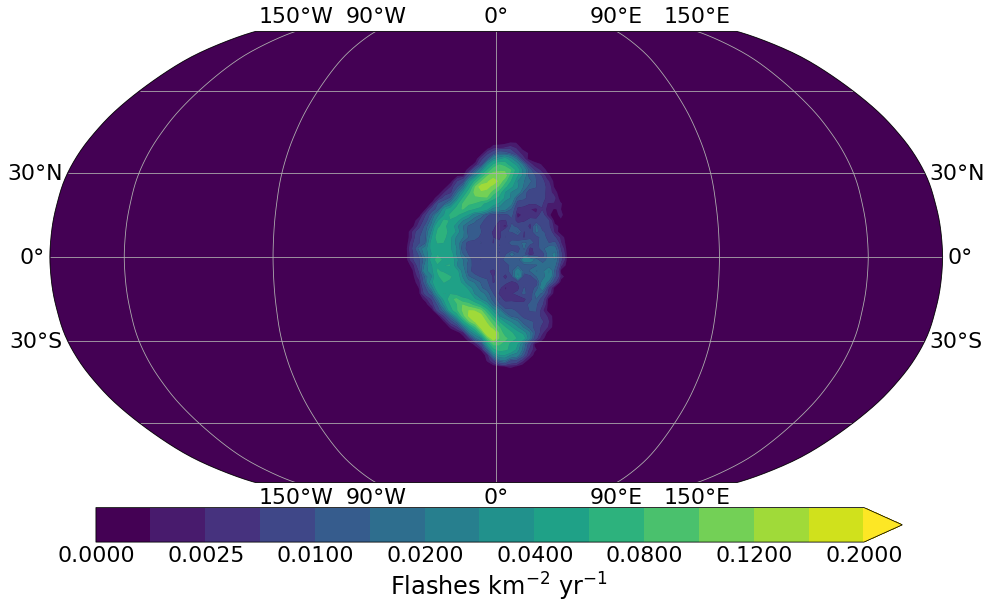

In [8]:
plt.figure(figsize=(16,8))
ax1 = plt.subplot(1,2,1)
iplt.plot(o3mmr_mday_y[:]*29.3/48*10**(9), o3mmr_mday_y.coord("Hybrid height")/1000, color='black', ls='-', label='O3 mmr')
ax1.set_title('Dayside', fontsize=15)
ax1.set_ylabel(r'Altitude (km)', fontsize=15)
ax1.set_xlabel('O$_3$ mixing ratio (ppb)', fontsize=15)
ax1.spines['bottom'].set_color('black')
ax1.xaxis.label.set_color('black')
ax1.set_xlim(0.0, 800)
ax1.set_ylim(0.0, 40)
ax1.tick_params(axis='x', which='major', labelsize=15)
ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis='y', which='major', labelsize=15)

# # twin object for two different y-axis on the sample plot
ax2=ax1.twiny()
# make a plot with different y-axis using second axis object
ax2.set_ylabel("gdpPercap",color="blue",fontsize=14)
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
iplt.plot(rf1_mday_y[:], rf1_mday_y.coord("Hybrid height")/1000, color='red', ls='-', label='R1')
iplt.plot(rf4_mday_y[:], rf4_mday_y.coord("Hybrid height")/1000, color='blue', ls='-', label='R5')
iplt.plot(rf5_mday_y[:], rf5_mday_y.coord("Hybrid height")/1000, color='green', ls='-', label='R10')
iplt.plot(rf6_mday_y[:], rf6_mday_y.coord("Hybrid height")/1000, color='purple', ls='-', label='R11')
iplt.plot(rf7_mday_y[:], rf7_mday_y.coord("Hybrid height")/1000, color='darkorange', ls='-', label='R12')
iplt.plot(rf8_mday_y[:], rf8_mday_y.coord("Hybrid height")/1000, color='gold', ls='-', label='R13')
ax2.set_xlim(0.0001, 1)
ax2.set_xscale('log')
ax2.spines['bottom'].set_position(('outward', 50))
ax2.spines['bottom'].set_color('black')
ax2.xaxis.label.set_color('black')
ax2.tick_params(axis='x', which='major', labelsize=15)
ax2.tick_params(axis='x', colors='black')
ax2.tick_params(axis='y', which='major', labelsize=15)
ax2.set_xlabel(u'Reaction flux (mol/s)', fontsize=15)


ax1 = plt.subplot(1,2,2)
iplt.plot(o3mmr_mday_y[:]*29.3/48*10**(9), o3mmr_mday_y.coord("Hybrid height")/1000, color='black', ls='-', label='O3 mmr')
ax1.set_title('Nightside', fontsize=15)
ax1.set_xlabel('O$_3$ mixing ratio (ppb)', fontsize=15)
ax1.spines['bottom'].set_color('black')
ax1.xaxis.label.set_color('black')
ax1.set_xlim(0.0, 800)
ax1.set_ylim(0.0, 0)
ax1.set_yticks([])
ax1.tick_params(axis='x', which='major', labelsize=15)
ax1.tick_params(axis='x', colors='black')

# # twin object for two different y-axis on the sample plot
ax2=ax1.twiny()
# make a plot with different y-axis using second axis object
ax2.set_ylabel("gdpPercap",color="black",fontsize=14)
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
iplt.plot(rf1_mnight_y[:], rf1_mnight_y.coord("Hybrid height")/1000, color='red', ls='-', label='R1')
iplt.plot(rf4_mnight_y[:], rf4_mnight_y.coord("Hybrid height")/1000, color='blue', ls='-', label='R5')
iplt.plot(rf5_mnight_y[:], rf5_mnight_y.coord("Hybrid height")/1000, color='green', ls='-', label='R10')
iplt.plot(rf6_mnight_y[:], rf6_mnight_y.coord("Hybrid height")/1000, color='purple', ls='-', label='R11')
iplt.plot(rf7_mnight_y[:], rf7_mnight_y.coord("Hybrid height")/1000, color='darkorange', ls='-', label='R12')
iplt.plot(rf8_mnight_y[:], rf8_mnight_y.coord("Hybrid height")/1000, color='gold', ls='-', label='R13')
ax2.set_xlim(0.0001, 1)
ax2.set_xscale('log')
ax2.spines['bottom'].set_position(('outward', 50))
ax2.spines['bottom'].set_color('black')
ax2.xaxis.label.set_color('black')
ax2.tick_params(axis='x', which='major', labelsize=15)
ax2.tick_params(axis='x', colors='black')
ax2.tick_params(axis='y', which='major', labelsize=15)
ax2.set_xlabel(u'Reaction flux (mol/s)', fontsize=15)
ax2.legend(loc='lower right', fontsize=15)
plt.show()



# Updated bin distribution for BT-Settl spectrum of M-dwarf at 3000 K (Figure A3 in Braam et al. 2022)

In [ ]:
n_a=6.0221409e23

plt.figure(figsize=(16,8))
ax1 = plt.subplot(1,2,1)
iplt.plot(o3mmr_mday[:]*29.3/48*10**(9), o3mmr_mday.coord("Hybrid height")/1000, color='black', ls='-', label='O3 mmr')
ax1.set_title('Dayside', fontsize=22)
ax1.set_ylabel(r'Altitude (km)', fontsize=20)
ax1.set_xlabel('O$_3$ mixing ratio (ppb)', fontsize=20)
ax1.spines['bottom'].set_color('black')
ax1.xaxis.label.set_color('black')
ax1.set_xlim(0.0, 1400)
ax1.set_ylim(0.0, 80)
ax1.tick_params(axis='x', which='major', labelsize=20)
ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis='y', which='major', labelsize=20)
ax1.annotate('O$_3$', xy=(1290, 35.8),  xycoords='data',
            xytext=(0.926, 0.37), size=22, textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top',
            )

# # twin object for two different y-axis on the sample plot
ax2=ax1.twiny()
# make a plot with different y-axis using second axis objec
ax2.set_ylabel("gdpPercap",color="blue",fontsize=14)
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
iplt.plot(rf1_mday[:]*n_a*1e-6, rf1_mday.coord("Hybrid height")/1000, color='red', ls='-', label='R1')
iplt.plot(rf4_mday[:]*n_a*1e-6, rf4_mday.coord("Hybrid height")/1000, color='blue', ls='-', label='R5')
iplt.plot(rf5_mday[:]*n_a*1e-6, rf5_mday.coord("Hybrid height")/1000, color='green', ls='-', label='R10')
iplt.plot(rf6_mday[:]*n_a*1e-6, rf6_mday.coord("Hybrid height")/1000, color='purple', ls='-', label='R11')
iplt.plot(rf7_mday[:]*n_a*1e-6, rf7_mday.coord("Hybrid height")/1000, color='darkorange', ls='-', label='R12')
iplt.plot(rf8_mday[:]*n_a*1e-6, rf8_mday.coord("Hybrid height")/1000, color='gold', ls='-', label='R13')
ax2.set_xlim(1e0, 1e5)
ax2.set_xscale('log')
ax2.spines['bottom'].set_position(('outward', 55))
ax2.spines['bottom'].set_color('black')
ax2.xaxis.label.set_color('black')
ax2.tick_params(axis='x', which='major', labelsize=20)
ax2.tick_params(axis='x', colors='black')
ax2.tick_params(axis='y', which='major', labelsize=20)
ax2.set_xlabel(u'Reaction flux (mol/s)', fontsize=20)

ax1 = plt.subplot(1,2,2)
iplt.plot(o3mmr_mday[:]*29.3/48*10**(9), o3mmr_mday.coord("Hybrid height")/1000, color='black', ls='-', label='O3 mmr')
ax1.set_title('Nightside', fontsize=22)
ax1.set_xlabel('O$_3$ mixing ratio (ppb)', fontsize=20)
ax1.spines['bottom'].set_color('black')
ax1.xaxis.label.set_color('black')
ax1.set_xlim(0.0, 1400)
ax1.set_ylim(0.0, 80)
ax1.set_yticks([])
ax1.tick_params(axis='x', which='major', labelsize=20)
ax1.tick_params(axis='x', colors='black')
ax1.annotate('O$_3$', xy=(1290, 35.8),  xycoords='data',
            xytext=(0.926, 0.37), size=22, textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top',
            )

# # twin object for two different y-axis on the sample plot
ax2=ax1.twiny()
# make a plot with different y-axis using second axis object
ax2.set_ylabel("gdpPercap",color="black",fontsize=14)
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
iplt.plot(rf1_mnight[:]*n_a*1e-6, rf1_mnight.coord("Hybrid height")/1000, color='red', ls='-', label='R1')
iplt.plot(rf4_mnight[:]*n_a*1e-6, rf4_mnight.coord("Hybrid height")/1000, color='blue', ls='-', label='R5')
iplt.plot(rf5_mnight[:]*n_a*1e-6, rf5_mnight.coord("Hybrid height")/1000, color='green', ls='-', label='R10')
iplt.plot(rf6_mnight[:]*n_a*1e-6, rf6_mnight.coord("Hybrid height")/1000, color='purple', ls='-', label='R11')
iplt.plot(rf7_mnight[:]*n_a*1e-6, rf7_mnight.coord("Hybrid height")/1000, color='darkorange', ls='-', label='R12')
iplt.plot(rf8_mnight[:]*n_a*1e-6, rf8_mnight.coord("Hybrid height")/1000, color='gold', ls='-', label='R13')
ax2.set_xlim(1e0,1e5)
ax2.set_xscale('log')
ax2.spines['bottom'].set_position(('outward', 55))
ax2.spines['bottom'].set_color('black')
ax2.xaxis.label.set_color('black')
ax2.tick_params(axis='x', which='major', labelsize=20)
ax2.tick_params(axis='x', colors='black')
ax2.tick_params(axis='y', which='major', labelsize=20)
ax2.set_xlabel(u'Reaction flux (mol/s)', fontsize=20)
ax2.legend(loc='upper center', fontsize=20, ncol=2)
plt.show()

